In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris= datasets.load_iris()

X= iris['data'][:, (2,3)]
y= (iris['target']==2).astype(np.float64)

In [3]:
svm_clf= Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', LinearSVC(C=1, loss='hinge', random_state=123))])

In [4]:
svm_clf.fit(X, y)
print(svm_clf.predict([[5.5, 1.7]]))
print(svm_clf.decision_function([[5.5, 1.7]]))

[1.]
[0.68627336]


In [5]:
scaler= StandardScaler()
svm_clf1= LinearSVC(C=1, loss='hinge', random_state=123)
svm_clf2= LinearSVC(C=100, loss='hinge', random_state=123)

scaled_svm_clf1= Pipeline([('scaler', scaler),
                          ('svm_1', svm_clf1)])

scaled_svm_clf2= Pipeline([('scaler', scaler),
                          ('svm_2', svm_clf2)])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_2', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=123, tol=0.0001, verbose=0))])

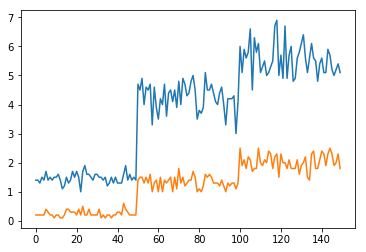

In [6]:
plt.plot(X)

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [8]:
X, y= make_moons(n_samples=1000, noise=0.15, random_state=123)


poly_svm_clf= Pipeline([('poly_feat', PolynomialFeatures(degree=3)),
                        ('scale', StandardScaler()),
                        ('svm', LinearSVC(C=10, loss='hinge'))])

poly_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

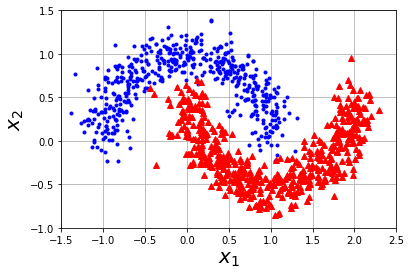

In [9]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'b.')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^')
    plt.axis(axes)
    plt.grid()
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20)
    
plot_dataset(X, y, [-1.5, 2.5, -1., 1.5])

In [10]:
def plot_predictions(clf, axes):
    x0s= np.linspace(axes[0], axes[1], 500)
    x1s= np.linspace(axes[2], axes[3], 500)
    x0, x1= np.meshgrid(x0s, x1s)
    X= np.c_[x0.ravel(), x1.ravel()]
    y_pred= clf.predict(X).reshape(x0.shape)
    y_decision= clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)

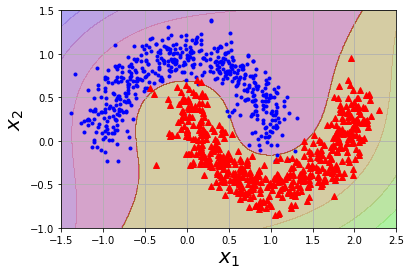

In [11]:
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1.0, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
plt.show()

In [12]:
from sklearn.svm import SVC

poly_kernel_svm_clf= Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [13]:
poly100_kernel_svm_clf= Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=20, C=5))])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=20,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

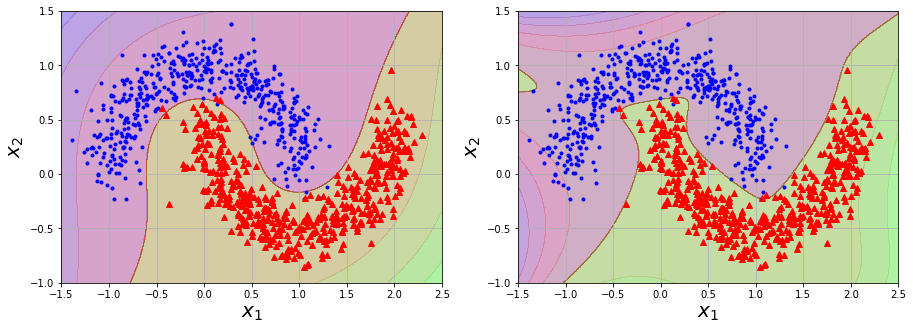

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1.0, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1.0, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])


plt.show()

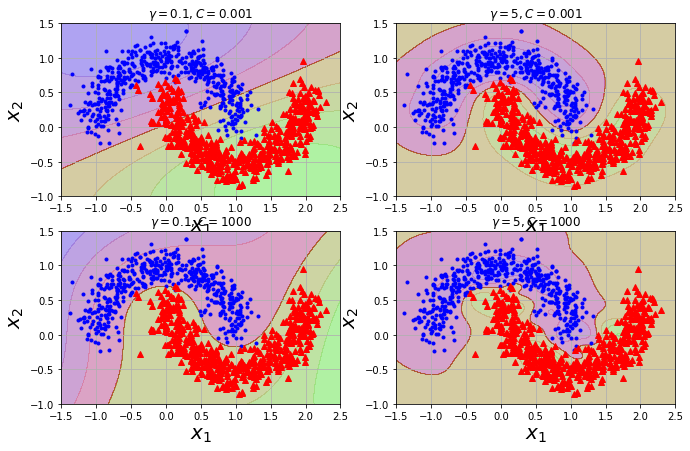

In [15]:
from sklearn.svm import SVC

gamma1, gamma2= 0.1, 5
C1, C2= 0.001, 1000
hyperparams= (gamma1, C1), (gamma2, C1), (gamma1, C2), (gamma2, C2)


svm_clfs=[]
for gamma, c in hyperparams:
    rbf_kernel_svm_clf= Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', gamma=gamma, C=c))])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
plt.figure(figsize=(11,7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1.0, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
    gamma, C= hyperparams[i]
    plt.title(r'$\gamma={}, C= {}$'.format(gamma, C))
    
plt.show()

In [16]:
# SVM Regression

np.random.seed(123)
m=50
X= 2*np.random.rand(m,1)
y= (4+ 3*X +np.random.randn(m,1)).ravel()

In [17]:
from sklearn.svm import LinearSVR

svm_reg= LinearSVR(epsilon=1.5, random_state=123)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=123, tol=0.0001, verbose=0)

In [18]:
svm_reg1= LinearSVR(epsilon=1.5, random_state=123)
svm_reg2= LinearSVR(epsilon=0.5, random_state=123)

svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=123, tol=0.0001, verbose=0)

In [19]:
def find_support_vectors(svm_reg, X, y):
    y_pred= svm_reg.predict(X)
    off_margin= (np.abs(y-y_pred)>= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_= find_support_vectors(svm_reg1, X, y)
svm_reg2.support_= find_support_vectors(svm_reg2, X, y)

In [20]:
eps_x1= 1
eps_y_pred= svm_reg1.predict([[eps_x1]])

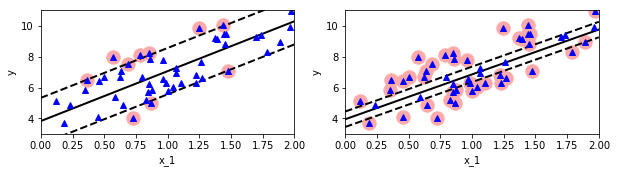

In [21]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s= np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred= svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label='y_pred')
    plt.plot(x1s, y_pred+svm_reg.epsilon, 'k--', linewidth=2 )
    plt.plot(x1s, y_pred-svm_reg.epsilon, 'k--', linewidth=2)
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, 'b^')
    plt.xlabel('x_1')
    plt.ylabel('y')
    plt.axis(axes)
    
plt.figure(figsize=(10,5))
plt.subplot(221)
plot_svm_regression(svm_reg1, X, y, [0,2,3,11])
plt.subplot(222)
plot_svm_regression(svm_reg2, X, y, [0,2,3,11])
plt.show()

In [22]:
np.random.seed(123)
m=100
X=2*np.random.rand(m,1)
y= (0.2*X + 0.5*X**2 + 0.1 +np.random.randn(m, 1)/10).ravel()

In [23]:
from sklearn.svm import SVR

svm_poly_reg= SVR(kernel='poly', degree=2, epsilon=1.5, gamma='auto', C=100)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=1.5, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
svm_poly_reg1= SVR(kernel='poly', degree=2, epsilon=.2, gamma='auto', C=100)
svm_poly_reg2= SVR(kernel='poly', degree=2, epsilon=0.1, gamma='auto', C=0.1)

svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

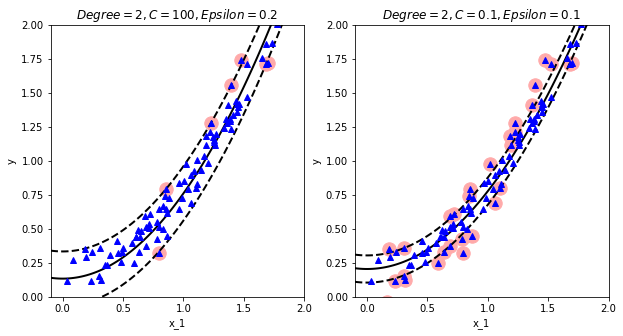

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-0.1,2,0,2])
plt.title('$Degree={}, C={}, Epsilon={}$'.format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon))
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-0.1,2,0,2])
plt.title('$Degree={}, C={}, Epsilon={}$'.format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon))
plt.show()

In [26]:
# Linear SVM with BGD

X= iris['data'][:, (2,3)]
y= (iris['target']==2).astype(np.float64).reshape(-1,1)

In [27]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C=C
        self.eta0=eta0
        self.eta_d= eta_d
        self.n_epochs=n_epochs
        self.random_state= random_state
        
    def eta(self, epoch):
        return self.eta0/(epoch+self.eta_d)
    
    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
        w= np.random.randn(X.shape[1], 1)
        b=0
        
        m=len(X)
        t=  y*2 -1
        X_t= X*t
        self.Js=[]
        
        for epoch in range(self.n_epochs):
            support_vectors_idx=(X_t.dot(w) +t*b <1 ).ravel()
            X_t_sv= X_t[support_vectors_idx]
            t_sv= t[support_vectors_idx]
            
            J= 1/2 * np.sum(w*w) + self.C * (np.sum(1- X_t_sv.dot(w)) - b*np.sum(t_sv))
            self.Js.append(J)
            
            w_gradient_vector= w -self.C* np.sum(X_t_sv, axis=0).reshape(-1,1)
            b_derivative= -C*np.sum(t_sv)
            
            w= w- self.eta(epoch)*w_gradient_vector
            b= b- self.eta(epoch)*b_derivative
            
            
        self.intercept_= np.array([[b]])
        self.coef_= np.array([w])
        support_vector_idx= (X_t.dot(w) + t*b <1).ravel()
        self.support_vectors_= X[support_vectors_idx]
        
    def decision_function(self, X):
        return X.dot(self.coef_[0]) +self.intercept_[0]
    
    def predict(self, X):
        return (self.decision_function(X)>=0).astype(np.float64)

In [28]:
C=2
svm_clf= MyLinearSVC(C=C, eta0= 10, eta_d=1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

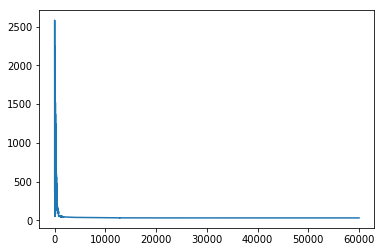

In [29]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)

In [30]:
print(svm_clf.intercept_, svm_clf.coef_)

[[-15.56780998]] [[[2.28129013]
  [2.71597487]]]


In [31]:
svm_clf2= SVC(kernel='linear', C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(loss='hinge', alpha=0.042, max_iter=100, tol= -np.infty, random_state=123)
sgd_clf.fit(X, y.ravel())

SGDClassifier(alpha=0.042, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=-inf, verbose=0, warm_start=False)

In [33]:
print(sgd_clf.intercept_, sgd_clf.coef_)

[-8.93992666] [[1.42573722 1.16162368]]


In [34]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [35]:
iris= datasets.load_iris()
X= iris['data'][:, (2,3)]
y= iris['target'] 

In [36]:
setosa_or_versicolor= (y==0) | (y==1)
X= X[setosa_or_versicolor]
y= y[setosa_or_versicolor]

In [37]:
C=5
alpha= 1/(C*len(X))

In [58]:
lin_clf= Pipeline([('scale', StandardScaler()),
                  ('lin_svm', LinearSVC(loss='hinge', C=C, random_state=123))])

sgd_clf= Pipeline([('scale', StandardScaler()), 
                   ('SGD', SGDClassifier(loss='hinge', learning_rate= 'constant', eta0=0.0001, 
                                         max_iter=100000, tol= -np.infty, random_state=123))])

svm_clf= Pipeline([('scale', StandardScaler()),
                  ('svc', SVC(kernel='linear', C=C, random_state=123))])

In [59]:
lin_clf.fit(X, y)
sgd_clf.fit(X, y)
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False))])

In [68]:
print('Linear SVM:     intercept: {} coef: {}'.format(lin_clf.named_steps['lin_svm'].intercept_, lin_clf.named_steps['lin_svm'].coef_))
print('SGD:            intercept: {} coef: {}'.format(sgd_clf.named_steps['SGD'].intercept_, sgd_clf.named_steps['SGD'].coef_))
print('SVM:            intercept: {} coef: {}'.format(svm_clf.named_steps['svc'].intercept_, svm_clf.named_steps['svc'].coef_))

Linear SVM:     intercept: [0.28481206] coef: [[1.05542478 1.09851942]]
SGD:            intercept: [0.3144] coef: [[1.11275329 1.03600036]]
SVM:            intercept: [0.31933577] coef: [[1.1223101  1.02531081]]


In [73]:
w1= -lin_clf.named_steps['lin_svm'].coef_[0,0]/lin_clf.named_steps['lin_svm'].coef_[0,1]
w2= -sgd_clf.named_steps['SGD'].coef_[0,0]/sgd_clf.named_steps['SGD'].coef_[0,1]
w3= -svm_clf.named_steps['svc'].coef_[0,0]/svm_clf.named_steps['svc'].coef_[0,1]

b1= -lin_clf.named_steps['lin_svm'].intercept_[0]/lin_clf.named_steps['lin_svm'].coef_[0,1]
b2= -sgd_clf.named_steps['SGD'].intercept_[0]/sgd_clf.named_steps['SGD'].coef_[0,1]
b3= -svm_clf.named_steps['svc'].intercept_[0]/svm_clf.named_steps['svc'].coef_[0,1]

In [76]:
scaler= StandardScaler()
scaler.fit_transform(X)

line1= scaler.inverse_transform([[-10, -10*w1+b1], [10, 10*w1+b1]])
line2= scaler.inverse_transform([[-10, -10*w2+b2], [10, 10*w2+b2]])
line3= scaler.inverse_transform([[-10, -10*w3+b3], [10, 10*w3+b3]])

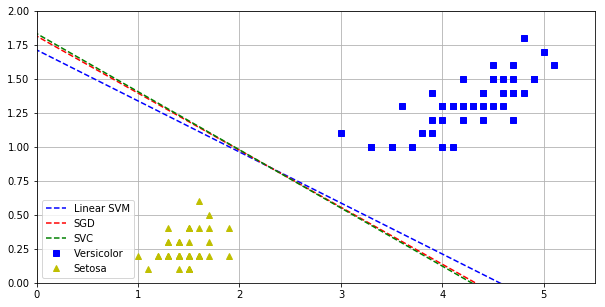

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(line1[:,0], line1[:,1], 'b--', label='Linear SVM')
plt.plot(line2[:,0], line2[:,1], 'r--', label='SGD')
plt.plot(line3[:,0], line3[:,1], 'g--', label='SVC')
plt.plot(X[:, 0][y==1], X[:,1][y==1], 'bs', label='Versicolor')
plt.plot(X[:, 0][y==0], X[:,1][y==0], 'y^', label='Setosa')
plt.legend()
plt.grid()
plt.axis([0,5.5, 0,2])
plt.show()

In [91]:
from sklearn.datasets import fetch_mldata
mnist= fetch_mldata('MNIST original')

In [93]:
X= mnist['data']
y= mnist['target']

In [108]:
X_train=X[:60000]
X_test=X[60000:]
y_train=y[:60000]
y_test=y[60000:]

In [109]:
np.random.seed(123)
rnd_idx= np.random.permutation(60000)
X_train= X_train[rnd_idx]
y_train= y_train[rnd_idx]

In [110]:
from sklearn.svm import LinearSVC

lin_clf= LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [111]:
from sklearn.metrics import accuracy_score

y_pred= lin_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8262

In [115]:
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [116]:
lin_clf= LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [117]:
y_pred= lin_clf.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.9103

In [127]:
svm_clf= SVC(decision_function_shape='ovr', gamma='auto')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

y_pred= svm_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9418

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distribs= {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv= RandomizedSearchCV(svm_clf, param_distribs, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:10000], y_train[:10000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=10.888676395943989, gamma=0.004674327973608433 ................
[CV] . C=10.888676395943989, gamma=0.004674327973608433, total=  54.3s
[CV] C=10.888676395943989, gamma=0.004674327973608433 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] . C=10.888676395943989, gamma=0.004674327973608433, total=  52.6s
[CV] C=10.888676395943989, gamma=0.004674327973608433 ................
[CV] . C=10.888676395943989, gamma=0.004674327973608433, total=  53.3s
[CV] C=4.653605990789975, gamma=0.004179256843022188 .................
[CV] .. C=4.653605990789975, gamma=0.004179256843022188, total=  48.0s
[CV] C=4.653605990789975, gamma=0.004179256843022188 .................
[CV] .. C=4.653605990789975, gamma=0.004179256843022188, total=  47.1s
[CV] C=4.653605990789975, gamma=0.004179256843022188 .................
[CV] .. C=4.653605990789975, gamma=0.004179256843022188, total=  47.9s
[CV] C=5.644063631108612, gamma=0.0026095493353400214 ................
[CV] . C=5.644063631108612, gamma=0.0026095493353400214, total=  34.2s
[CV] C=5.644063631108612, gamma=0.0026095493353400214 ................
[CV] . C=5.644063631108612, gamma=0.0026095493353400214, total=  32.2s
[CV] C=5.644063631108612, gamma=0.0026095493353400214 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 40.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027889752A20>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027889752F28>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [133]:
rnd_search_cv.best_estimator_

SVC(C=8.405083429038786, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001307059220657979,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [134]:
rnd_search_cv.best_score_

0.9433

In [136]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=8.405083429038786, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001307059220657979,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [137]:
y_pred= rnd_search_cv.best_estimator_.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.9726

In [163]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, reciprocal

In [164]:
housing= fetch_california_housing()
X= housing['data']
y=housing['target']

In [165]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [166]:
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [167]:
lin_svr= LinearSVR(random_state= 123)

lin_svr.fit(X_train_scaled, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=123, tol=0.0001, verbose=0)

In [168]:
y_pred= lin_svr.predict(X_train_scaled)

np.sqrt(mean_squared_error(y_train, y_pred))

1.1963123738364976

In [170]:
param_dists= {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv= RandomizedSearchCV(SVR(), param_dists, n_iter=10, cv=3, verbose=2, random_state=123)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.964691855978616, gamma=0.0037348973478010345 ................
[CV] . C=7.964691855978616, gamma=0.0037348973478010345, total=   3.7s
[CV] C=7.964691855978616, gamma=0.0037348973478010345 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] . C=7.964691855978616, gamma=0.0037348973478010345, total=   3.7s
[CV] C=7.964691855978616, gamma=0.0037348973478010345 ................
[CV] . C=7.964691855978616, gamma=0.0037348973478010345, total=   3.7s
[CV] C=3.268514535642031, gamma=0.01266570994661668 ..................
[CV] ... C=3.268514535642031, gamma=0.01266570994661668, total=   3.6s
[CV] C=3.268514535642031, gamma=0.01266570994661668 ..................
[CV] ... C=3.268514535642031, gamma=0.01266570994661668, total=   3.6s
[CV] C=3.268514535642031, gamma=0.01266570994661668 ..................
[CV] ... C=3.268514535642031, gamma=0.01266570994661668, total=   3.7s
[CV] C=8.19468969785563, gamma=0.007017992831138442 ..................
[CV] ... C=8.19468969785563, gamma=0.007017992831138442, total=   3.7s
[CV] C=8.19468969785563, gamma=0.007017992831138442 ..................
[CV] ... C=8.19468969785563, gamma=0.007017992831138442, total=   3.7s
[CV] C=8.19468969785563, gamma=0.007017992831138442 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000278897B4588>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000278897B4B00>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [173]:
rnd_search_cv.best_estimator_

SVR(C=4.980442553304314, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.029922013287804066, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
rnd_search_cv.best_score_

0.7060192987480318

In [178]:
y_pred= rnd_search_cv.best_estimator_.predict(X_train_scaled)
np.sqrt(mean_squared_error(y_train, y_pred ))

0.611467209511203

In [179]:
y_pred= rnd_search_cv.best_estimator_.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred ))

0.6076584154969179